In [3]:
import kagglehub
from glob import glob
import numpy as np
import h5py
import h5py
import matplotlib.pyplot as plt

D:\Captures\Anaconda\envs\new_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import matplotlib.patches as mpatches

## Import the Dataset

In [5]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("anhoangvo/acdc-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Hp\.cache\kagglehub\datasets\anhoangvo\acdc-dataset\versions\1


In [6]:
training_file_path = r'C:\Users\Hp\.cache\kagglehub\datasets\anhoangvo\acdc-dataset\versions\1\ACDC_preprocessed\ACDC_training_volumes\patient050_frame01.h5'

### Check the unique labels of the dataset

In [7]:
#Check masks and scribbles labels for the training images
with h5py.File(training_file_path, 'r') as h5_file:
    mask = h5_file['label'][:]
    unique_labels = np.unique(mask)
    print("Unique labels in the mask:", unique_labels)

Unique labels in the mask: [0 1 2 3]


### Map the labels to actual values to be used in the legend

In [8]:
# Create a legend for the labels and use it to prepare legend for the visualization
color_map = {0: 'Background',
        1: 'RV',
        2: 'Myocardium',
        3: 'LV'}

legend_patches = [
        mpatches.Patch(color=plt.cm.jet(i / len(color_map)), label=f'{label}') 
        for i, label in enumerate(color_map.values())]

### See the content of one of the training images
#### each image has 10 slices
Here we print an overlay of the MRI image and corresponding mask

Images shape: (10, 256, 232)
Label shape: (10, 256, 232)


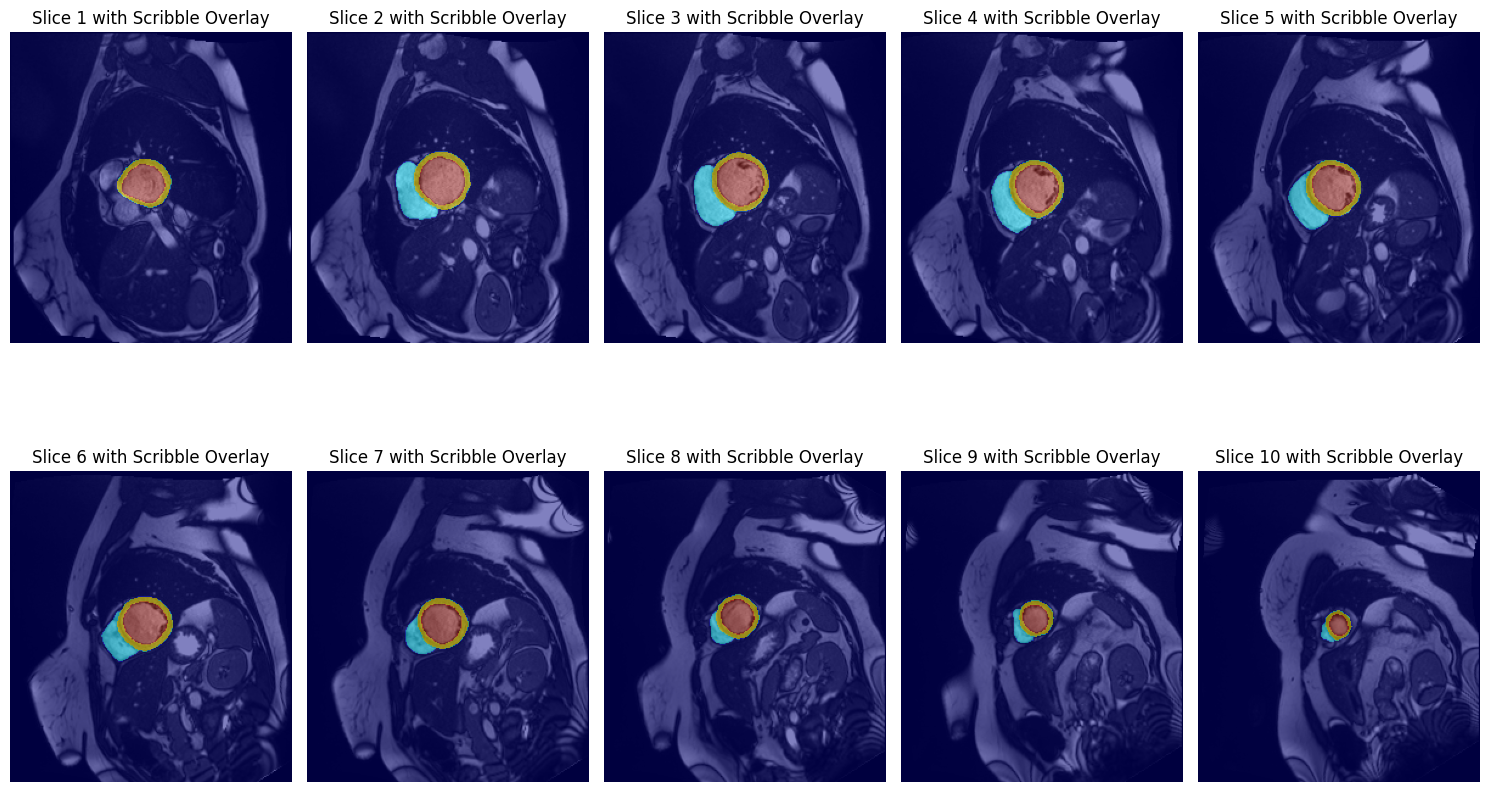

In [10]:
# Open the HDF5 file
test_file_path = r'C:\Users\Hp\.cache\kagglehub\datasets\anhoangvo\acdc-dataset\versions\1\ACDC_preprocessed\ACDC_testing_volumes\patient101_frame01.h5'
with h5py.File(test_file_path, 'r') as h5_file:
    # Access the 'image' and 'label' datasets
    images = h5_file['image']
    labels = h5_file['label']
    
    # Check that the number of images and labels match
    print("Images shape:", images.shape)
    print("Label shape:", labels.shape)
    
    # Display the images in a 2x5 grid (2 rows, 5 columns)
    fig, axes = plt.subplots(2, 5, figsize=(15, 10))  # 2 rows, 5 columns
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier iteration

    for i in range(10):  # We are displaying 10 images
        # Display the image
        axes[i].imshow(images[i], cmap='gray')  # Show the base image
        # Overlay the label mask
        axes[i].imshow(labels[i], cmap='jet', alpha=0.5)  # Adjust alpha for transparency
        axes[i].axis('off')  # Turn off axis for each subplot
        axes[i].set_title(f"Slice {i + 1} with Scribble Overlay")
    
    # Optionally, add a legend (uncomment if needed)
    # plt.legend(handles=legend_patches)

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()
